Datasets can be downloaded [here](https://www.dropbox.com/sh/xekjl6x2yw4eizf/AADkPqRyXFcT5XrQJZiE5hO9a?dl=0)  
Data preparation is illustrated [here](https://nbviewer.jupyter.org/github/pinellolab/STREAM/blob/master/tutorial/prep_buenrostro_2018.ipynb) 

Ref: Buenrostro, J.D. et al. Integrated Single-Cell Analysis Maps the Continuous Regulatory Landscape of Human Hematopoietic Differentiation. Cell (2018).

In [2]:
import stream as st
st.__version__

'1.0'

In [3]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [4]:
adata=st.read(file_name='./mat.tsv.gz',workdir='./result_atac')

Saving results in: ./result_atac


In [5]:
adata

AnnData object with n_obs × n_vars = 2034 × 465536
    uns: 'workdir'

> **To load and use 10x Genomics single cell ATAC-seq data processed with Cell Ranger:**   
```python
adata=st.read(file_name='./filtered_peak_bc_matrix/matrix.mtx',
              file_sample='./filtered_peak_bc_matrix/barcodes.tsv',
              file_feature='./filtered_peak_bc_matrix/peaks.bed',
              file_format='mtx',workdir='./result_atac') 
adata.var.index = adata.var[0].astype(str) + '_' + adata.var[1].astype(str) +'_' + adata.var[2].astype(str)
```

In [6]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

In [7]:
st.cal_qc(adata,assay='atac')

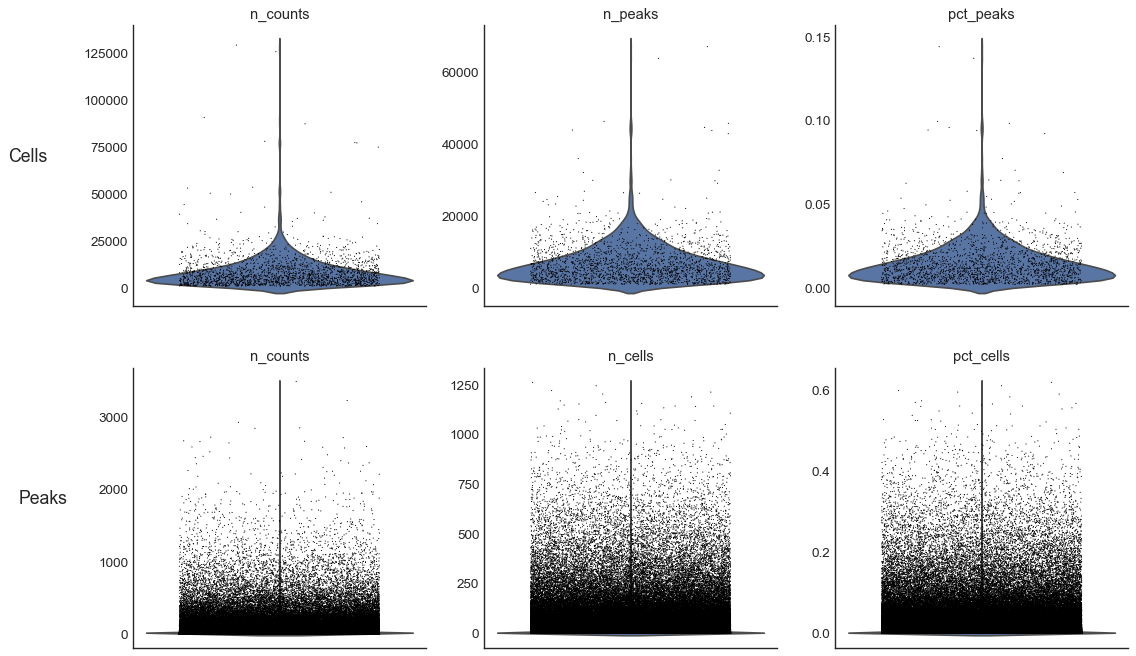

In [8]:
st.plot_qc(adata,jitter=0.3)

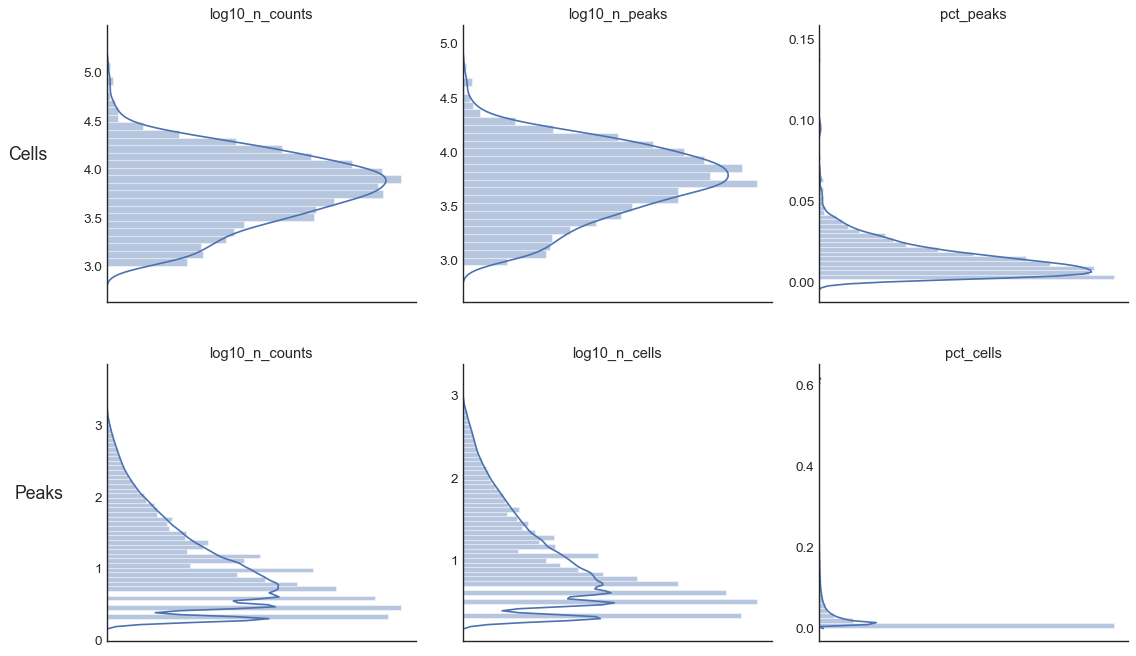

In [9]:
st.plot_qc(adata,log_scale=[0,1,3,4],hist_plot=range(6),jitter=0.3)

In [10]:
st.filter_cells(adata,min_n_features=100)
st.filter_features(adata,min_n_cells=20)

filter cells based on min_n_features
after filtering out low-quality cells: 
2034 cells, 465536 peaks
Filter peaks based on min_n_cells
After filtering out low-expressed peaks: 
2034 cells, 126719 peaks


#### LSI transformation

In [11]:
adata.X[adata.X>0] = 1 ###binarization
st.normalize(adata,method='tf_idf')

In [12]:
adata

AnnData object with n_obs × n_vars = 2034 × 126719
    obs: 'label', 'n_counts', 'n_peaks', 'pct_peaks'
    var: 'n_counts', 'n_cells', 'pct_cells'
    uns: 'workdir', 'label_color', 'assay'

#### Feature selection

using all the features ...
50 PCs are selected


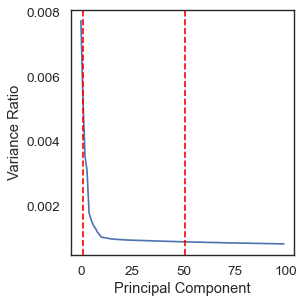

In [13]:
st.select_top_principal_components(adata,first_pc=False,n_pc=50)

#### Dimension reduction

In [14]:
st.dimension_reduction(adata,method='se',feature='top_pcs',n_components=5,n_neighbors=100,n_jobs=4)

feature top_pcs is being used ...
4 cpus are being used ...


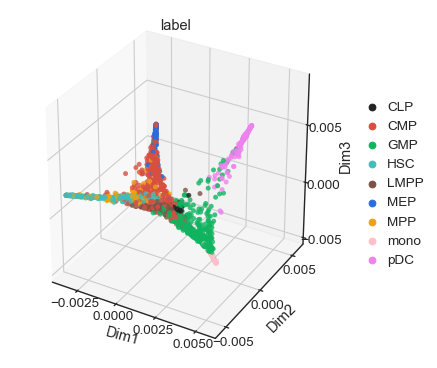

In [15]:
st.plot_dimension_reduction(adata,color=['label'],show_graph=False,show_text=False,)

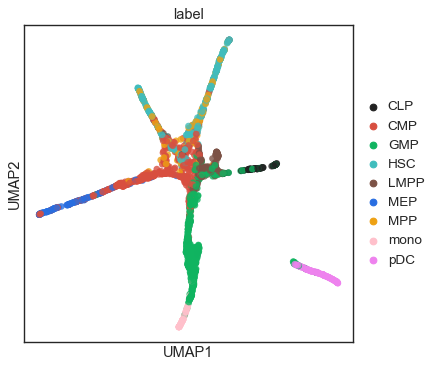

In [17]:
st.plot_visualization_2D(adata,n_neighbors=100,color=['label'],use_precomputed=False)

#### Trajectory inference

* By default, trajectories will be inferred in **the manifold learnt from the step of dimension reduction `st.dimension_reduction()`**


* But it can be also learned directly on **2D visualization plot from `st.plot_visualization_2D()`** by setting `use_vis=True` in st.seed_elastic_principal_graph(). An example can be found [here](https://nbviewer.jupyter.org/github/pinellolab/STREAM/blob/master/tutorial/1.2.use_vis.ipynb)

In [18]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 6


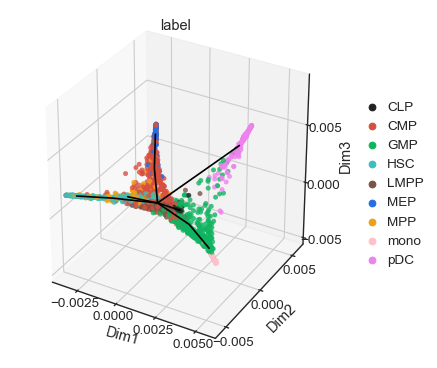

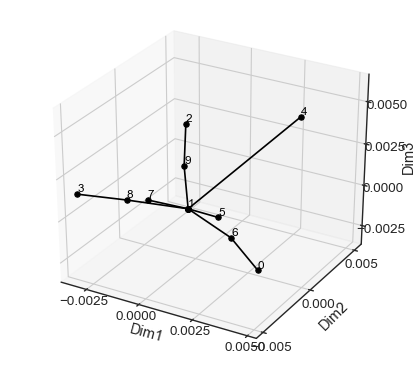

In [19]:
st.plot_dimension_reduction(adata,color=['label'],show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [20]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.01)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2034 points and 5 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|0|1||50
	
1.261e-06
	
50
	
49
	
42
	
1
	
0
	
0
	
5.763e-07
	
5.045e-07
	
0.9792
	
0.9818
	
5.566e-07
	
1.277e-07
	
6.385e-06
	
0.0003193
	
0


13.115 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


Importing precomputed umap visualization ...


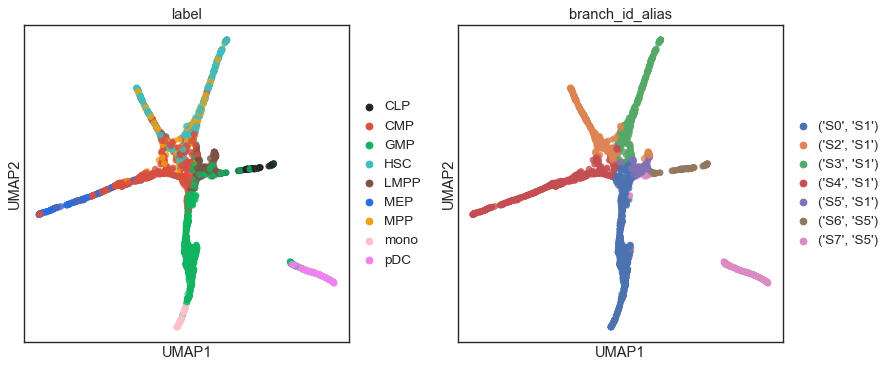

In [21]:
st.plot_visualization_2D(adata,n_neighbors=30,color=['label','branch_id_alias'],fig_ncol=4)

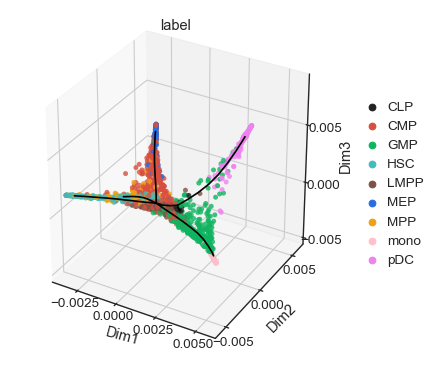

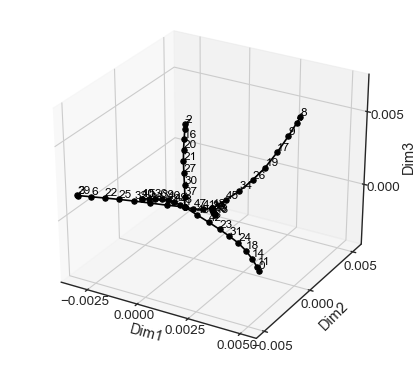

In [22]:
st.plot_dimension_reduction(adata,color=['label'],show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 7


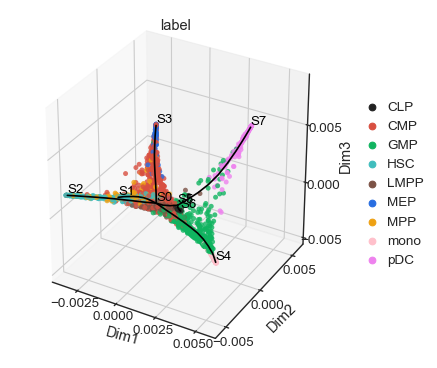

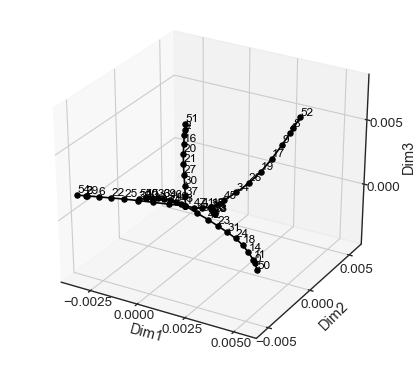

In [23]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

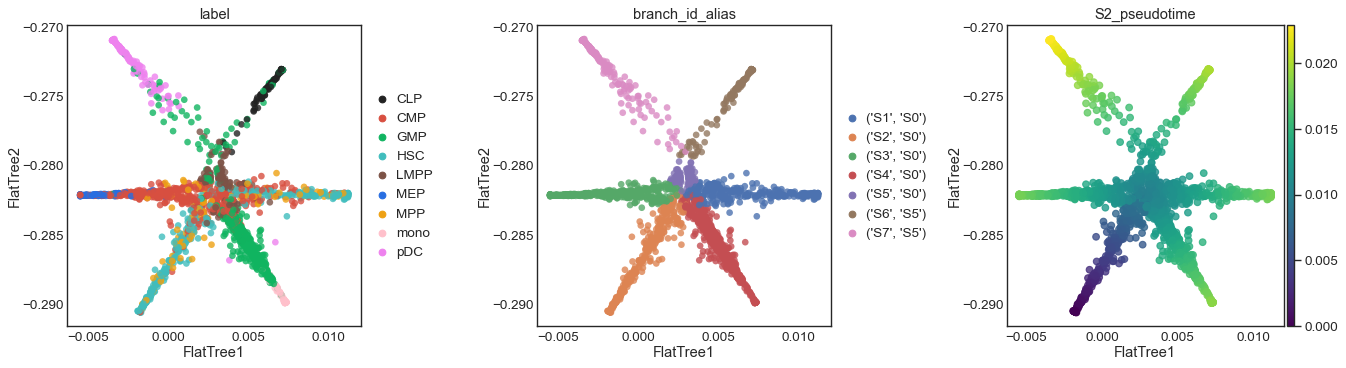

In [24]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S2_pseudotime'],
                  dist_scale=0.5,show_graph=False,show_text=False)

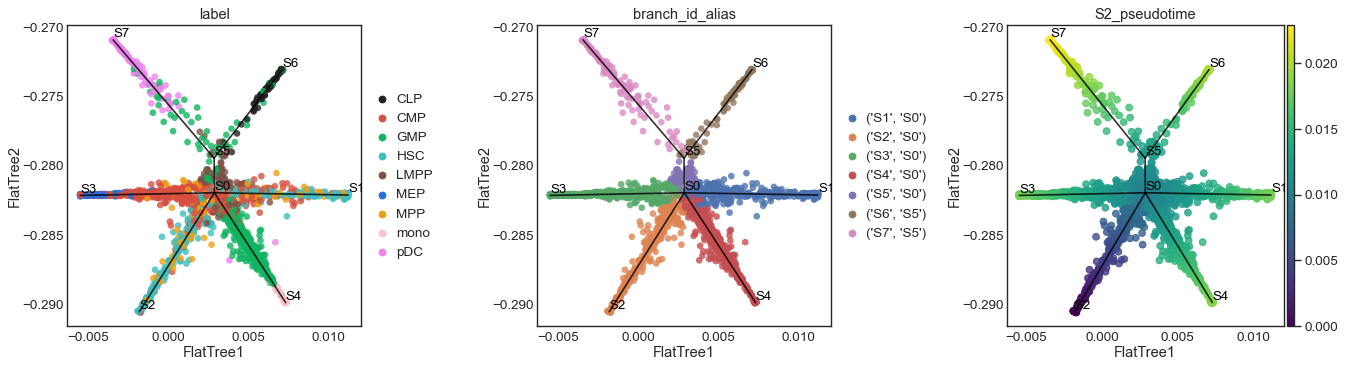

In [25]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S2_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

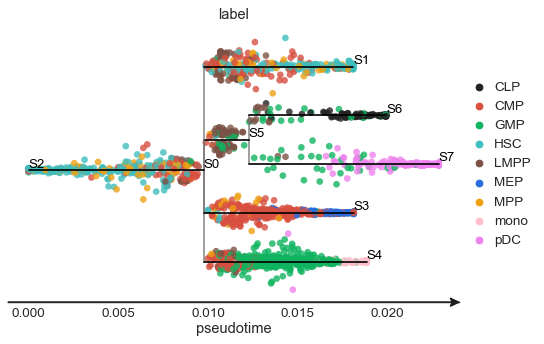

In [26]:
st.plot_stream_sc(adata,root='S2',color=['label'],
                  dist_scale=0.5,show_graph=True,show_text=True)

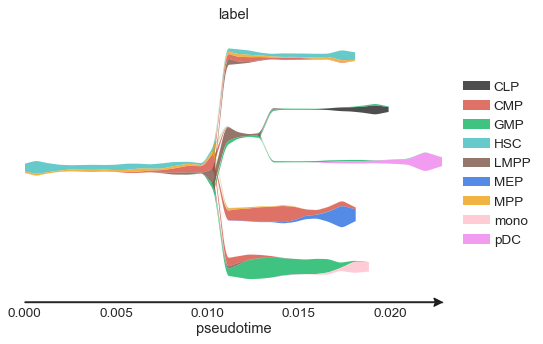

In [27]:
st.plot_stream(adata,root='S2',color=['label'])

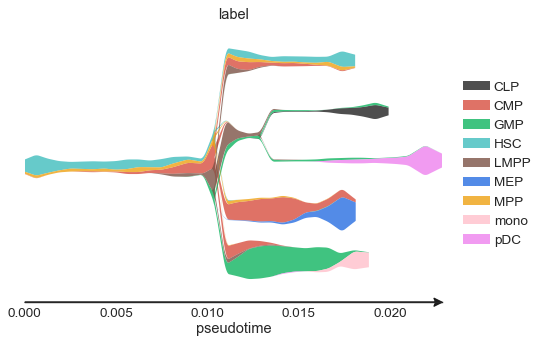

In [28]:
st.plot_stream(adata,root='S2',color=['label'],dist_scale=1.5)

#### Marker peaks detection

In [39]:
st.detect_leaf_markers(adata,marker_list=adata.var[adata.var['pct_cells']>0.1].index[:1000],
                       cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S1',n_jobs=4)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
4 cpus are being used ...
1000 markers are being scanned ...


In [40]:
adata.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S0S2_pvalue,S5S6_pvalue,S5S7_pvalue,S0S3_pvalue,S0S4_pvalue
chr1_153316244_153316744,1.99543,208.943,3.46483e-43,7.50054e-16,6.0345e-13,1.55844e-17,5.79801e-24,1,2.31817e-39
chr1_22192536_22193036,2.11995,208.23,4.92492e-43,3.18796e-37,5.91293e-40,1.49564e-24,1,2.71929e-26,1.44069e-24
chr1_43429184_43429684,1.91797,182.744,1.38784e-37,2.50462e-19,8.47747e-10,7.2495e-14,4.73132e-08,1,1.13027e-37
chr1_21620867_21621367,2.00705,175.209,5.64079e-36,3.03839e-27,1.72508e-20,1.82425e-10,1,3.08267e-34,5.81846e-14
chr1_59221069_59221569,1.9805,172.563,2.07057e-35,7.72735e-12,1,8.15814e-20,3.42885e-25,2.75201e-23,9.65561e-25


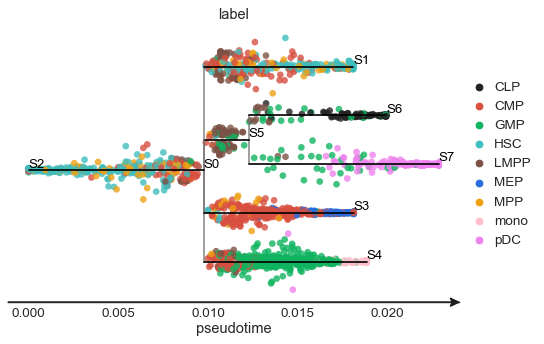

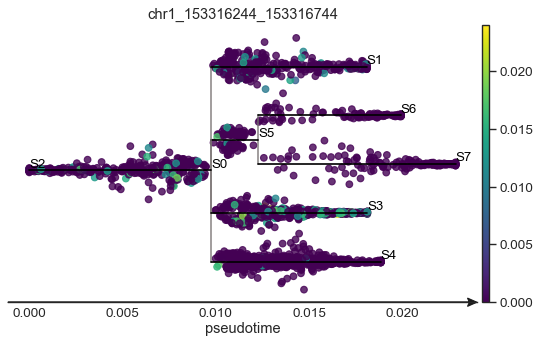

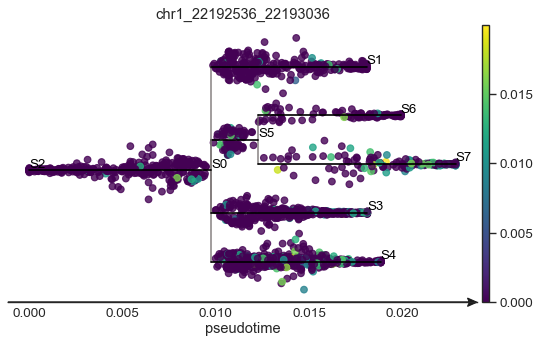

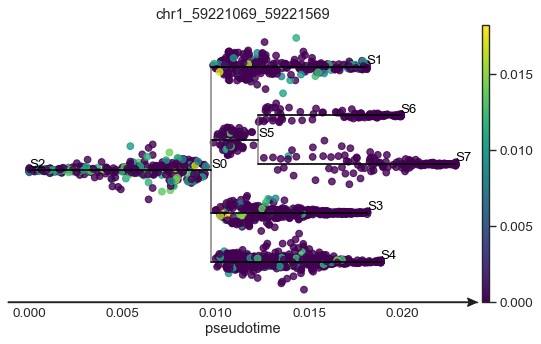

In [42]:
st.plot_stream_sc(adata,root='S2',color=['label','chr1_153316244_153316744','chr1_22192536_22193036','chr1_59221069_59221569'],
                  dist_scale=0.5,show_graph=True,show_text=True)

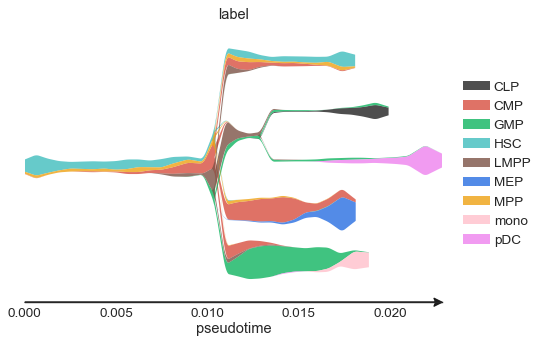

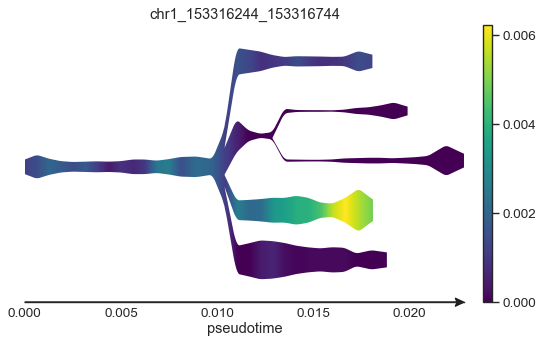

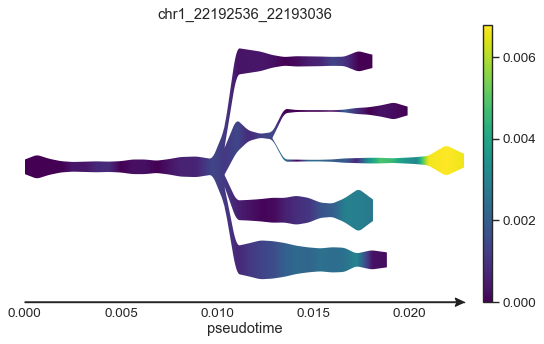

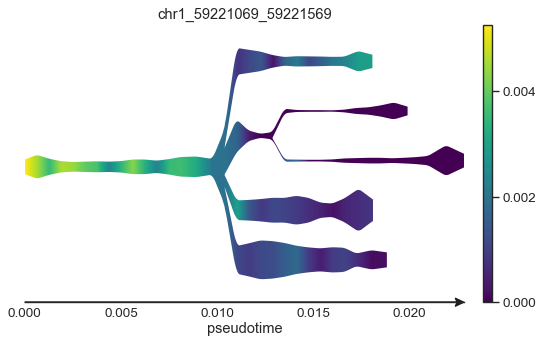

In [43]:
st.plot_stream(adata,root='S2',color=['label','chr1_153316244_153316744','chr1_22192536_22193036','chr1_59221069_59221569'],
               dist_scale=1.5)

#### Save results

In [44]:
st.write(adata,file_name='stream_atac_peaks.pkl')